In [26]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Practice with fashion MNIST

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
#instead of referencing the labels each time, we can create a list of all categories to index what we want to access
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

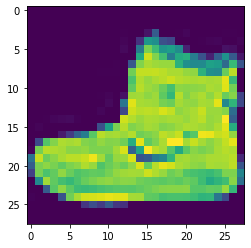

In [8]:
plt.imshow(X_train_full[0])

### Data reshape

In [ ]:
#for ANN we used flatten function because the input must be a one-dimensional array
#reshape the data because for CNN we need 3-d array (height and width of pixels and number of channels)
X_train_full = X_train_full.reshape((60000, 28, 28, 1)) #28 28 1 dimensions = 1 is the channel (since the imgs are in greyscale there is only 1 channel)
X_test = X_test.reshape((10000, 28, 28, 1))

### Data normalization

normalize the data so dimensions are approximately the same scale.

In [9]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Split into train, validation and test sets

In [13]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Create model architecture

In [18]:
np.random.seed(42)
tf.random.set_seed(42)

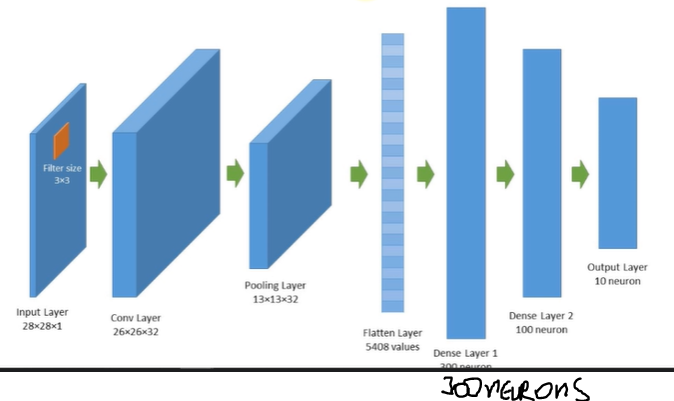

In [34]:
#buid model architecture
model = keras.models.Sequential()
### Convolutional ###
#convolutional layer: 32 filters, kernel_size is filter size, input shape is img dimensions, the third value should be 3 if colored imgs
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = "valid", activation = "relu", input_shape = (28, 28, 1)))
#pooling layer = maxpooling, reduces img size by taking the max pixel value in a 2 by 2 window
model.add(keras.layers.MaxPooling2D((2,2)))
    
### Neural Network ###
#flatten input from the convolution to one-dimensional array
model.add(keras.layers.Flatten())
#first neuron layers of NN
model.add(keras.layers.Dense(300, activation = "relu"))
#second layer 
model.add(keras.layers.Dense(100, activation = "relu"))
#output layer = number of neurons are the number of classes to be prediccted
model.add(keras.layers.Dense(10, activation = "softmax"))

In [36]:
model.summary() #inspect model architecture
#layers
#shape of layers
#number of parameters: note the amount of total parameters to estimate in the first dense layer. If no maxpooling layer
#were present, the number would increase

#the number of paramaters of conv. layer is calculated as:
    #((width_filter * height_filter * n_filter_previous_layer) + 1) * n_filters

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                      

In [37]:
#compile the model
model.compile(loss = "sparse_categorical_crossentropy", #cross entropy function for multiple classes
             optimizer = "sgd", #stochastic gradient descent to find optimal weights and biases
             metrics = ["accuracy"])

In [38]:
#remember to use callbacks to make checkpoints saving of the model and early stopping callback
model_history = model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_data = (X_valid, y_valid))

Epoch 1/10
860/860 [==============================] - 19s 22ms/step - loss: 0.8767 - accuracy: 0.6992 - val_loss: 0.7489 - val_accuracy: 0.7368
Epoch 2/10
860/860 [==============================] - 18s 21ms/step - loss: 0.5386 - accuracy: 0.8051 - val_loss: 0.4915 - val_accuracy: 0.8186
Epoch 3/10
860/860 [==============================] - 19s 22ms/step - loss: 0.4805 - accuracy: 0.8259 - val_loss: 0.9241 - val_accuracy: 0.7080
Epoch 4/10
860/860 [==============================] - 19s 22ms/step - loss: 0.4432 - accuracy: 0.8421 - val_loss: 0.4148 - val_accuracy: 0.8562
Epoch 5/10
860/860 [==============================] - 19s 23ms/step - loss: 0.4192 - accuracy: 0.8504 - val_loss: 0.4368 - val_accuracy: 0.8466
Epoch 6/10
860/860 [==============================] - 21s 24ms/step - loss: 0.3953 - accuracy: 0.8587 - val_loss: 0.3770 - val_accuracy: 0.8698
Epoch 7/10
860/860 [==============================] - 19s 22ms/step - loss: 0.3776 - accuracy: 0.8656 - val_loss: 0.4044 - val_accuracy:

In [39]:
model_history.history #you can access the values of loss and acc for each epoch

{'loss': [0.8766923546791077,
  0.5386129021644592,
  0.48050230741500854,
  0.44322630763053894,
  0.41921910643577576,
  0.3952751159667969,
  0.3776323199272156,
  0.36268991231918335,
  0.34846168756484985,
  0.3365376889705658],
 'accuracy': [0.6991817951202393,
  0.8050545454025269,
  0.8258545398712158,
  0.8420727252960205,
  0.8504363894462585,
  0.8586909174919128,
  0.8656181693077087,
  0.8693090677261353,
  0.8744545578956604,
  0.878636360168457],
 'val_loss': [0.7489014863967896,
  0.49154508113861084,
  0.9240864515304565,
  0.41481176018714905,
  0.4367945194244385,
  0.3770187199115753,
  0.4044108986854553,
  0.5158387422561646,
  0.37079918384552,
  0.38628077507019043],
 'val_accuracy': [0.7368000149726868,
  0.8185999989509583,
  0.7080000042915344,
  0.8561999797821045,
  0.8465999960899353,
  0.8697999715805054,
  0.8569999933242798,
  0.8086000084877014,
  0.8679999709129333,
  0.8582000136375427]}

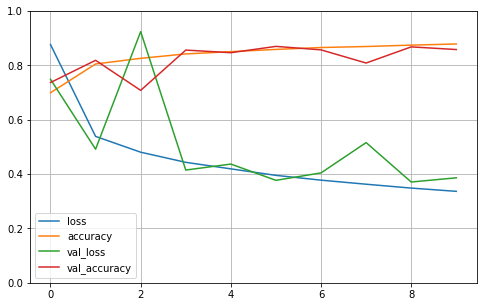

In [41]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Note that the models applied in training and validation still didn't converged, so we could keep training from the last epoch
# to improve acc of the model. Another fact that could improve the acc is the addition of more convolutional layers

In [42]:
model.evaluate(X_test_n, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4183 - accuracy: 0.8434


[0.4183140993118286, 0.8434000015258789]

In [56]:
#apply the model to a new subset
X_new = X_test[:3]
X_new.shape

(3, 28, 28)

In [67]:
#predict probabilities of classes
y_prob = model.predict(X_new)
print(np.round(y_prob, decimals = 3))

[[0.    0.    0.    0.    0.    0.006 0.    0.023 0.003 0.968]
 [0.    0.    0.987 0.    0.001 0.    0.012 0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]]


In [61]:
#predict the class itself
y_pred = np.argmax(model.predict(X_new), axis = 1)
y_pred #the ouput is an array with the three predict classes 

array([9, 2, 1], dtype=int64)

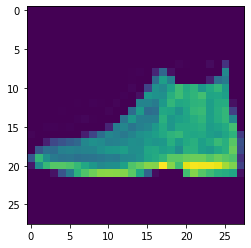

In [50]:
plt.imshow(X_new[0].reshape((28,28)))